In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

# Read in data
df = pd.read_csv('data.csv')

# Long to wide
df2 = df.groupby(['Date','Element', 'ID']).sum().unstack('ID').copy()
df2.columns = df2.columns.get_level_values(1)

# Convert all values to celsius
df2[df2.select_dtypes(include=['number']).columns] *= 0.1

max_temps = df2.loc[df2.index.get_level_values(1) == 'TMAX',].copy()
max_temps.index = max_temps.index.get_level_values(0)
max_temps['max'] = max_temps.max(axis=1, skipna=True)

min_temps = df2.loc[df2.index.get_level_values(1) == 'TMIN',].copy()
min_temps.index = min_temps.index.get_level_values(0)
min_temps['min'] = min_temps.min(axis=1, skipna=True)

# Create frame to hold the min and max values
dfp = pd.concat([max_temps['max'], min_temps['min']], axis=1)
dfp.index = pd.to_datetime(dfp.index)
dfp = dfp.loc[ ~((dfp.index.day == 29) & (dfp.index.month == 2)),]

# Break the fame into two: range 2005-2014 and 2015
dfp2 = dfp.loc['2015-01-01':'2015-12-31'].copy()
dfp = dfp.loc['2005-01-01':'2014-12-31']

# Reformat frames to be ready for plotting
srs1 = dfp['max'].groupby([dfp['max'].index.month, dfp['max'].index.day]).max()
srs2 = dfp['min'].groupby([dfp['min'].index.month, dfp['min'].index.day]).min()
dfp = pd.concat([srs1, srs2], axis=1)

srs1 = dfp2['max'].groupby([dfp2['max'].index.month, dfp2['max'].index.day]).max()
srs2 = dfp2['min'].groupby([dfp2['min'].index.month, dfp2['min'].index.day]).min()
dfp2 = pd.concat([srs1, srs2], axis=1)

dfp2.head()

max   min
Date Date           
1    1     5.6   0.1
     2     6.3   2.0
     3     4.3  -0.3
     4     1.3  -4.5
     5    -0.5 -14.5

In [15]:
# Cumulative sum of days in each month
cumsum = 0
for i in range(12):
    cumsum = cumsum + len(dfp.loc[dfp.index.get_level_values(0) == (i+1),]) 
    print(cumsum)

dfp2['max_broken'] = 0
dfp2['min_broken'] = 0

dfp2.loc[dfp2['max'] > dfp['max'] ,'max_broken'] = 1
dfp2.loc[dfp2['min'] < dfp['min'] ,'min_broken'] = 1

print(dfp.head())
print(dfp2.head())

31
59
90
120
151
181
212
243
273
304
334
365
           max   min
Date Date           
1    1     5.4 -18.1
     2     4.9 -26.8
     3     5.4 -30.4
     4     5.5 -26.6
     5     6.7 -25.6
           max   min  max_broken  min_broken
Date Date                                   
1    1     5.6   0.1           1           0
     2     6.3   2.0           1           0
     3     4.3  -0.3           0           0
     4     1.3  -4.5           0           0
     5    -0.5 -14.5           0           0


In [16]:
mpl.get_backend()
print(plt.style.available)
plt.style.use('seaborn-poster')
# https://www.coursera.org/learn/python-plotting/discussions/weeks/2/threads/7Rh0RAQ1Eee-uQ7R_UJsXg

['seaborn-whitegrid', 'fivethirtyeight', 'seaborn', 'seaborn-talk', 'seaborn-notebook', '_classic_test', 'seaborn-deep', 'bmh', 'seaborn-colorblind', 'grayscale', 'seaborn-bright', 'seaborn-darkgrid', 'seaborn-white', 'seaborn-dark-palette', 'seaborn-muted', 'ggplot', 'classic', 'seaborn-dark', 'seaborn-paper', 'dark_background', 'seaborn-poster', 'seaborn-pastel', 'seaborn-ticks']


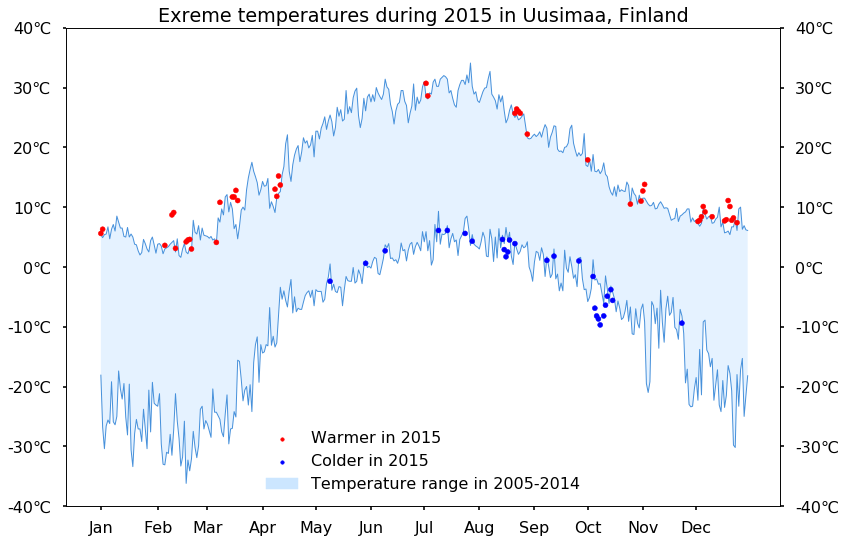

In [17]:
# Data for plot
x = range(len(dfp))
y1 = dfp['max']
y2 = dfp['min']
y3 = dfp2['max']
y4 = dfp2['min']

# Figure, axes and plots
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1_copy = ax1.twinx()
ax1.plot(x,y1,alpha = 0.7, linewidth = 1.0, color = '#0066cc')
ax1.plot(x,y2,alpha = 0.7, linewidth = 1.0, color = '#0066cc')
ax1.fill_between(x, y1, y2, facecolor = '#cce6ff',  alpha=0.50)

# Main axis stuff
ax1.set_title('Exreme temperatures during 2015 in Uusimaa, Finland')
xticks = ax1.set_xticks([0,32,60,91,121,152,182,213,244,274,305,335])
xlabels = ax1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax1.set_ylim(-40,40)
yticks = [-40, -30, -20, -10, 0, 10, 20, 30, 40]
ax1.set_yticks(yticks)
ylabels = ['-40℃','-30℃','-20℃','-10℃','0℃','10℃','20℃','30℃','40℃']
ax1.set_yticklabels(ylabels)
ax1.grid(False)

# Secondary axis stuff
maxmarkerw = [25 if dfp2.iloc[i,2] == 1 else 0 for i in range(len(y3))]
minmarkerw = [25 if dfp2.iloc[i,3] == 1 else 0 for i in range(len(y3))]
ax1_copy.scatter(x, y3, s = maxmarkerw, color = 'red', label = 'Warmer in 2015')
ax1_copy.scatter(x, y4, s = minmarkerw, color = 'blue', label = 'Colder in 2015')
ax1_copy.set_ylim(ax1.get_ylim()[0],ax1.get_ylim()[1])
ax1_copy.set_yticks(yticks)
ax1_copy.set_yticklabels(ylabels)
ax1_copy.grid(False)

# Legend
handles, labels = ax1_copy.get_legend_handles_labels()
area_patch = mpatches.Patch(color = '#cce6ff', label='Temperature range in 2005-2014')
handles = [handles[0],handles[1], area_patch]
ax1_copy.legend(handles = handles, loc = 8, frameon=False)

# Show/save figure
plt.savefig('extreme_temperatures.png', bbox_inches='tight')
fig